In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv('D:\\dataset\\house-prices-advanced-regression-techniques\\train.csv')
test = pd.read_csv('D:\\dataset\\house-prices-advanced-regression-techniques\\test.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# 针对训练集的每个特征, 进行了一些统计分析, 如下：
# 1. 特征值的唯一值数量. nunique()函数可以查看每列的唯一值的数量
# 2. 缺失值所占比例. isnull().sum()可以查看每列缺失值的数量
# 3. 出现次数最多的值的频率. value_counts()函数可以查看每个特征值出现的次数, 并可以通过normalize=True参数计算频率
#    它返回一个包含唯一值及其出现次数的 Series 对象，其中索引是唯一值，值是出现频率。dropna=False：表示在计算时包含缺失值
# 4. 特征类型
stats=[]
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum()*100 / train.shape[0], 
                  train[col].value_counts(normalize=True,dropna=False).values[0]*100, train[col].dtype))
    stats_df=pd.DataFrame(stats,columns=['Feature','Unique_values','Percentage of missing values',
                                         'Percentage of values in the biggest categoty','type'])
stats_df.sort_values('Percentage of missing values',ascending=False)[:10]


,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest categoty,type
72,PoolQC,3,99.520548,99.520548,object
74,MiscFeature,4,96.301370,96.301370,object
6,Alley,2,93.767123,93.767123,object
73,Fence,4,80.753425,80.753425,object
25,MasVnrType,3,59.726027,59.726027,object
57,FireplaceQu,5,47.260274,47.260274,object
3,LotFrontage,110,17.739726,17.739726,float64
59,GarageYrBlt,97,5.547945,5.547945,float64
64,GarageCond,5,5.547945,90.821918,object
58,GarageType,6,5.547945,59.589041,object


<Axes: >

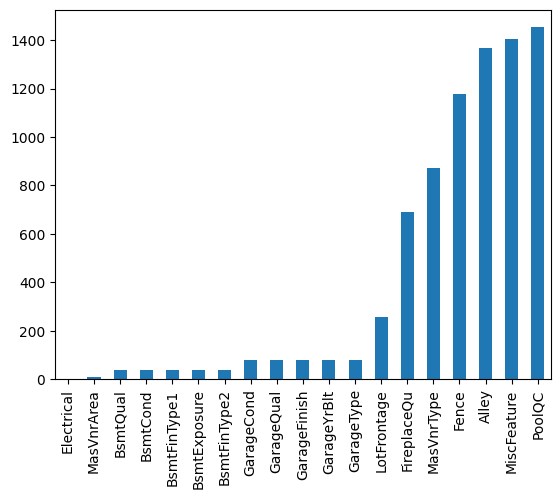

In [8]:
# 对缺失值进行可视化
missing = train.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

d:\office_software\anaconda\install\envs\daily\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

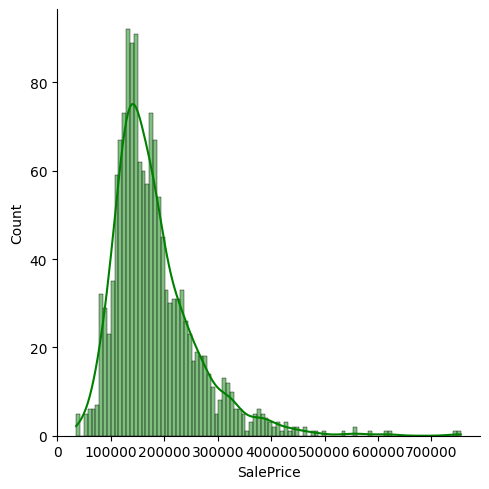

In [9]:
# 对房屋价格这一特征进行核密度可视化
# displot()的参数如下：
# 1. x：表示数据
# 2. color: 表示颜色
# 3. bins：表示直方图的个数
# 4. kde：是否显示核密度曲线
plt.figure(figsize=(10, 6))
sns.displot(x=train['SalePrice'],color='g',bins=100,kde=True)

d:\office_software\anaconda\install\envs\daily\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

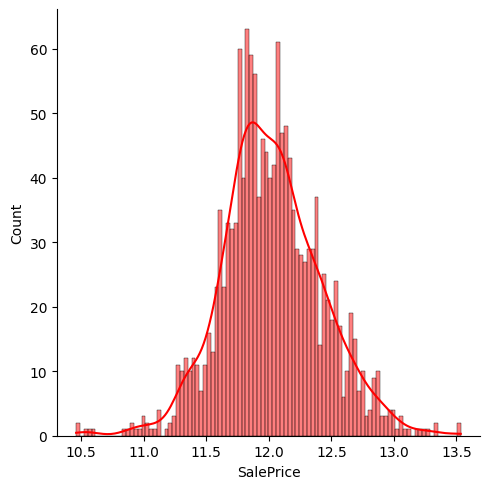

In [10]:
# 对房屋价格取了对数之后再进行可视化, 数据更加符合正态分布
plt.figure(figsize=(10,10))
sns.displot(np.log(train['SalePrice']),color='r',bins=100,kde=True)

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>],
       [<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>]], dtype=object)

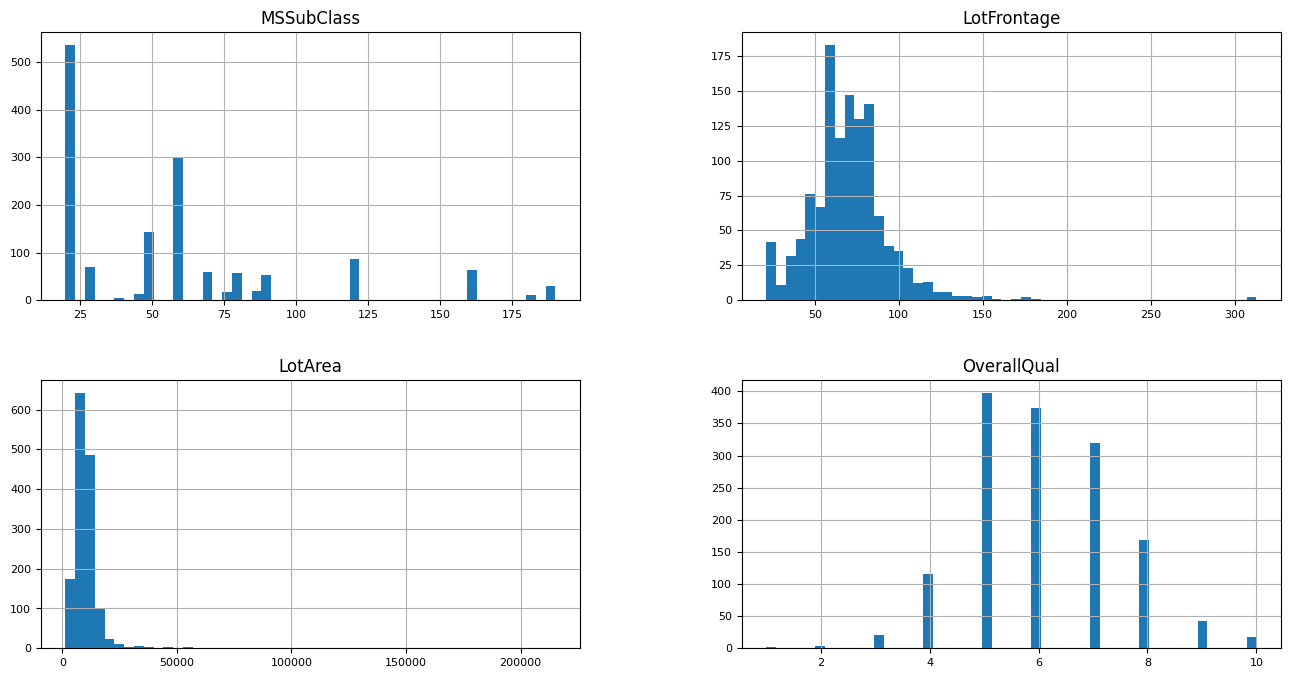

In [11]:
# 连续型变量的分布情况
# 1. 使用select_dtypes(),参数incleude=['int64','float64']表示选择的数据类型
# 2. tolist()函数将 series 转化为列表
df_num=train.select_dtypes(include=['int64','float64'])
df_num=df_num[df_num.columns.tolist()[1:5:]]
df_num.hist(figsize=(16,8),bins=50,xlabelsize=8,ylabelsize=8)

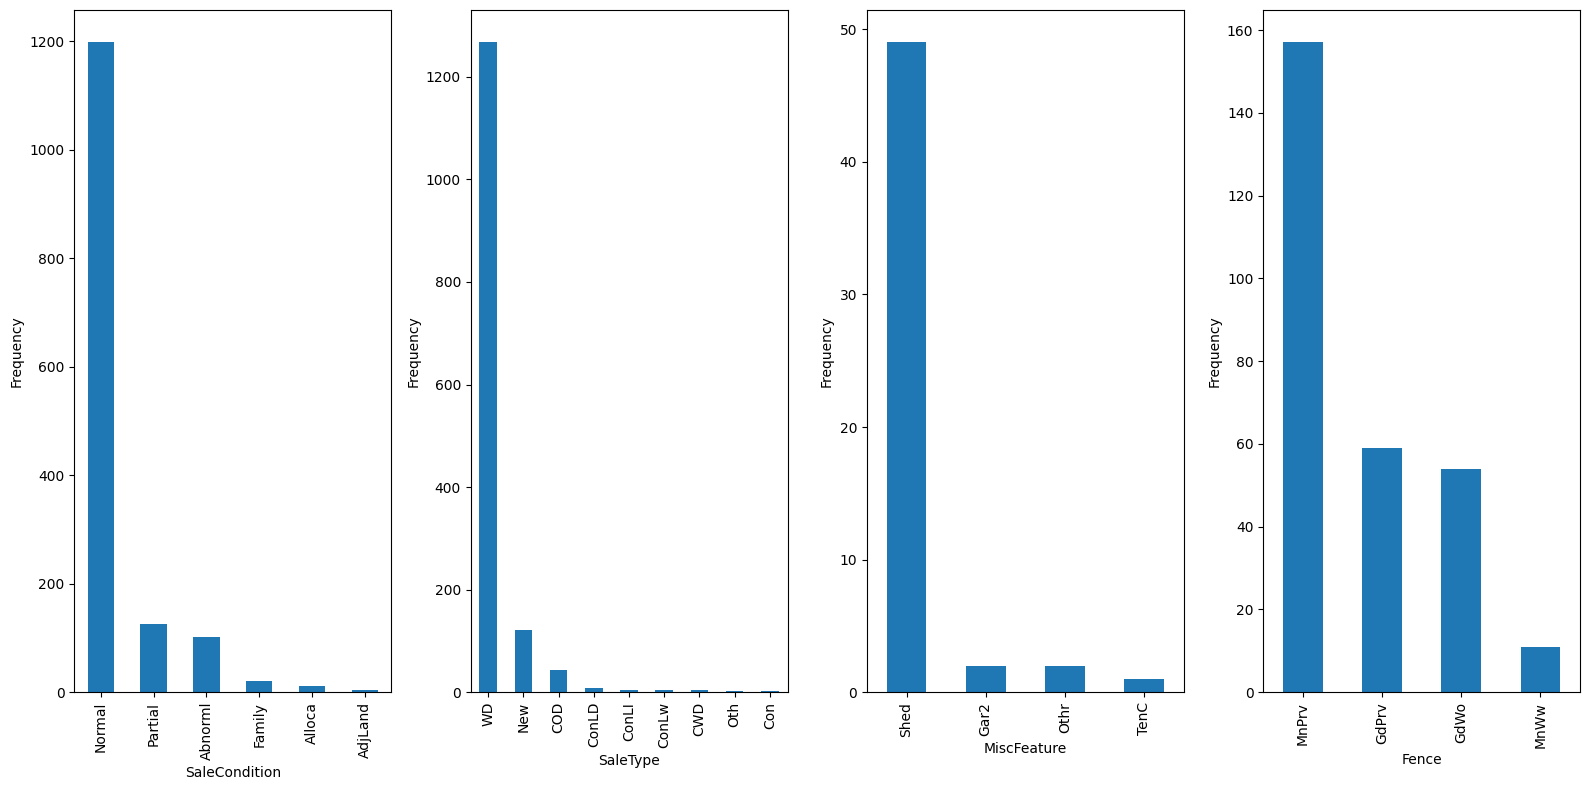

In [12]:
# 针对 object 变量, 进行可视化
df_obj=train.select_dtypes(include=['object'])
df_obj=df_obj[df_obj.columns.tolist()[-1:-5:-1]]
fig, axes = plt.subplots(nrows=1, ncols=len(df_obj.columns), figsize=(16, 8))
for i,col in enumerate(df_obj.columns):
    counts = df_obj[col].value_counts()
    counts.plot.bar(ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

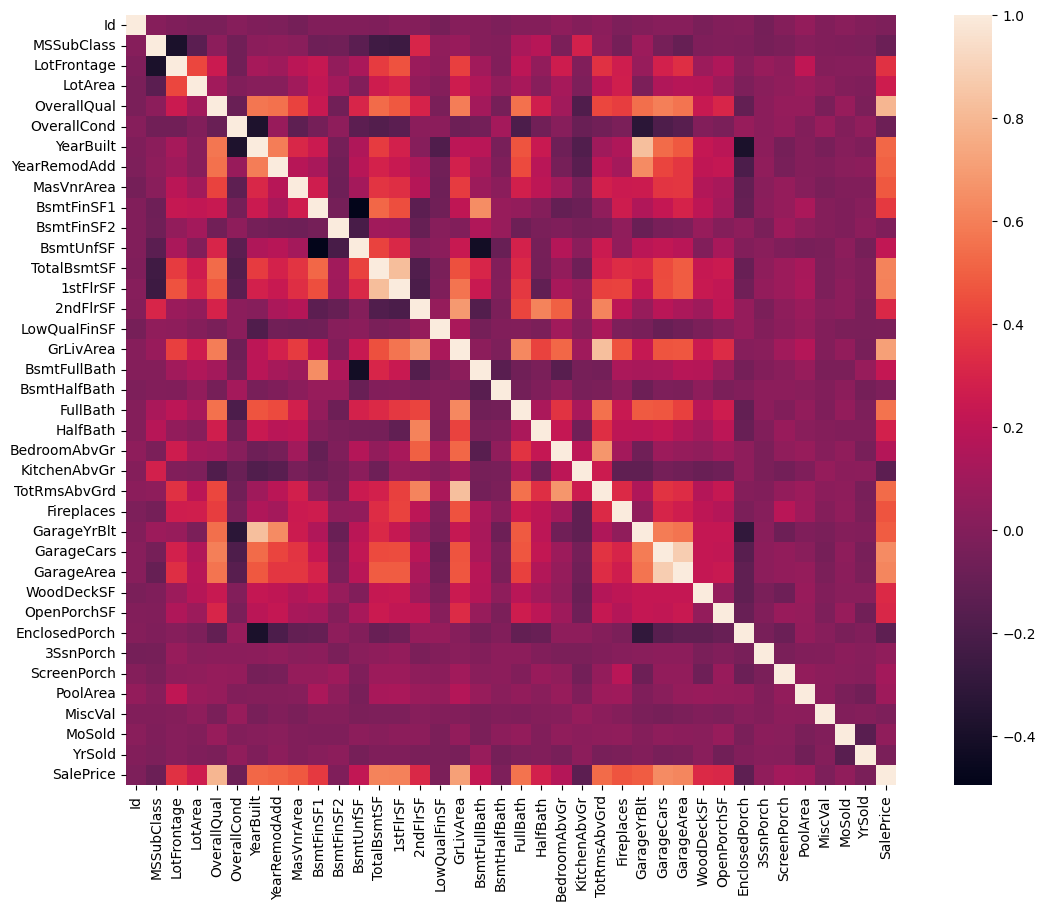

In [13]:
# 绘制数值型特征的相似性矩阵, heatmap()包含以下参数：
# 1. 相关性矩阵
# 2. vmax：颜色的亮度，取值0-1
# 3. square：是否显示为正方形
corrmat=train.select_dtypes(include=['float64','int64']).corr()
fig.ax=plt.subplots(figsize=(15,10))
sns.heatmap(corrmat,vmax=1,square=True)
plt.show()

进行多变量分析

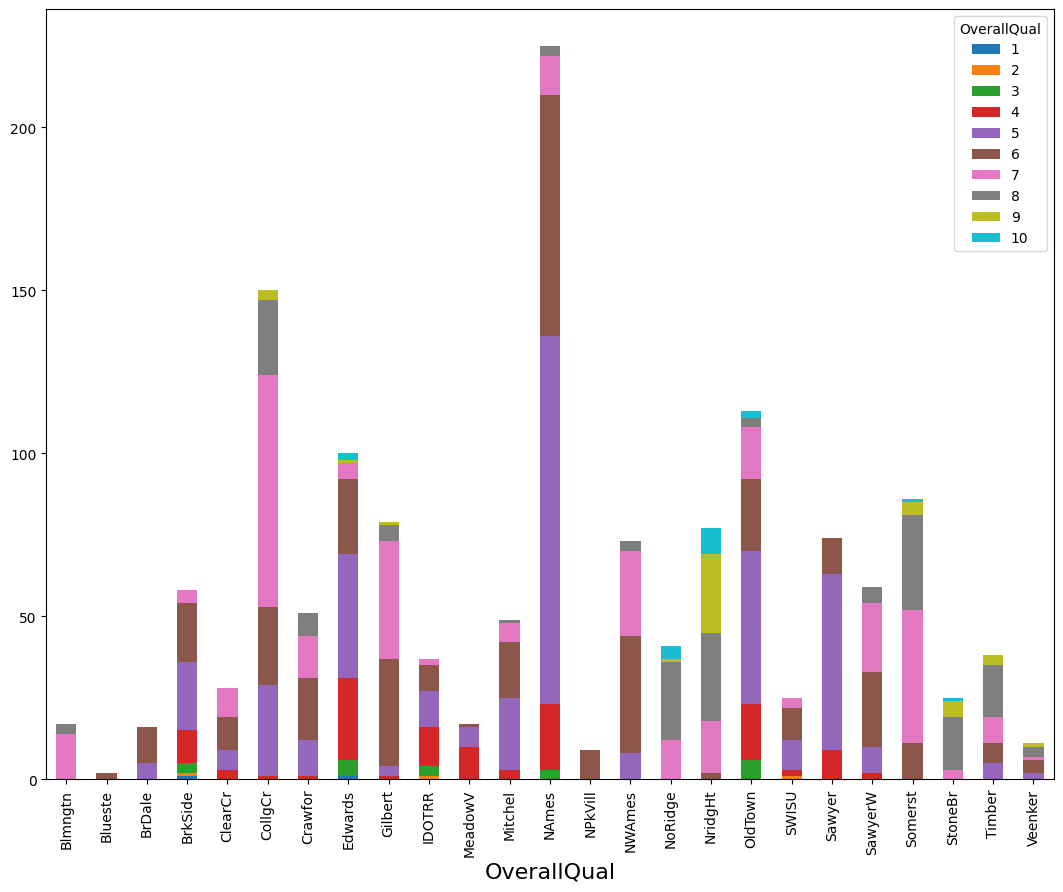

In [22]:
# groupby表示对数据进行分组，size表示对分组后的数据进行计数，对 Neighborhood, OverllQual 进行二级分组并计数。
# unstack表示对数据进行展开，将一级分组作为行, 将二级分组作为列。
# plot()中的参数包括：
# 1. kind: 绘制图的类型
# 2. stacked: 是否堆叠
# 3. figsize: 图的大小
# 4. colormap: 颜色映射
# 5. grid: 是否显示网格
type_cluster = train.groupby(['Neighborhood','OverallQual']).size()
type_cluster.unstack().plot(kind='bar',stacked=True,figsize=(13,10),grid=False)
plt.xlabel('OverallQual',fontsize=16)
plt.show()

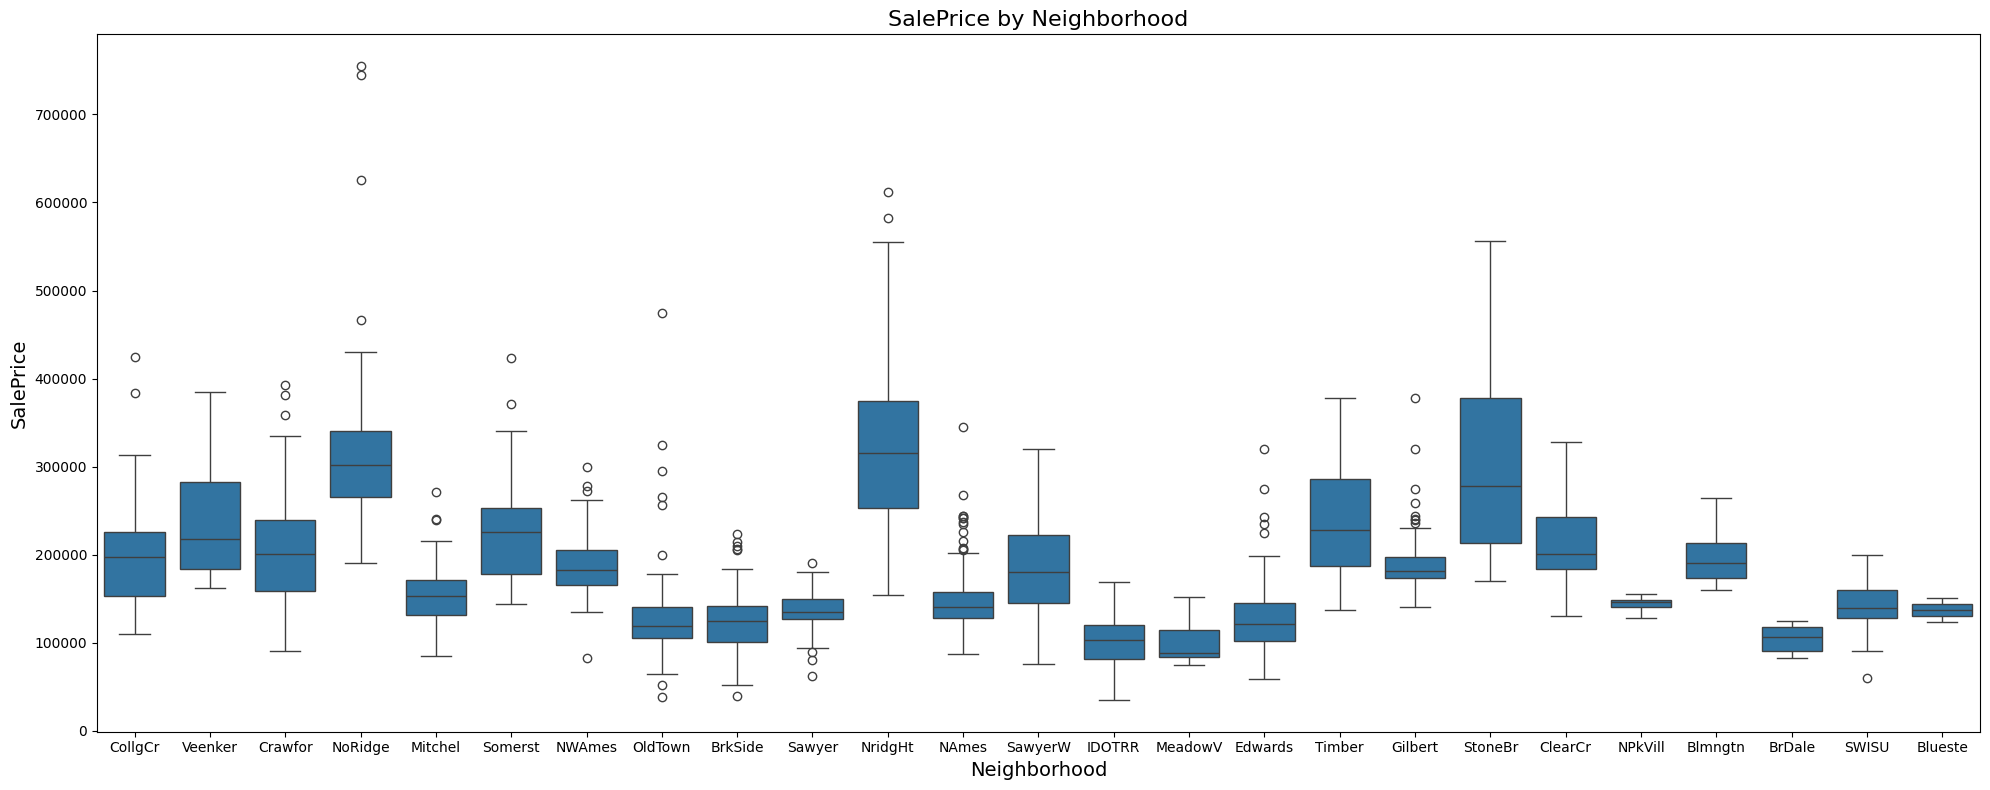

In [27]:
# boxplot参数包括：
# x：表示横轴
# y：表示纵轴
# data：表示数据
plt.figure(figsize=(20, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)
plt.title('SalePrice by Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)
plt.tight_layout()
plt.show()